# Day 2 – Multiple Linear & Polynomial Regression 

Today, we explore what happens when one input isn't enough or when the relationship isn't strictly linear.

This notebook walks through how to build a **multiple linear regression** model, explore **polynomial relationships**, interpret coefficients, and evaluate model performance.

## Load the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load data
mission_df = pd.read_csv("/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/mission_data.csv")
mission_df.head()

,mission_id,crew_size,mission_duration,distance_km,solar_flare_risk,fuel_capacity,oxygen_reserve,launch_day_temp,mental_health_score,comm_delay,anomaly_detected,mission_type,mission_success_score
0,MSN_0000,8,190,365.087064,0.320381,829.934114,130.730624,10.074432,0.818863,11.089683,0,resupply,19.190786
1,MSN_0001,5,236,378.075560,0.075308,847.907383,75.617616,19.173706,0.960807,9.208195,0,resupply,19.836566
2,MSN_0002,6,208,301.600207,0.416936,1099.062080,91.648318,12.940053,0.696440,10.722013,1,rescue,19.066117
3,MSN_0003,8,162,262.329106,0.287994,766.985429,100.489583,17.246547,0.888106,8.129583,0,exploration,20.467528
4,MSN_0004,4,153,322.998607,0.204623,761.868693,117.060716,6.307427,0.804730,9.530875,0,exploration,17.168499


## Select Features

In [3]:
features = ["crew_size", "distance_km", "fuel_capacity", 
            "solar_flare_risk", "mental_health_score"]
X = mission_df[features]
y = mission_df["mission_success_score"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Fit Multiple Linear Regression

In [4]:
model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

print("Intercept:", model.intercept_)
print("Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")

Intercept: 18.426836876084597
Coefficients:
crew_size: 0.087
distance_km: -1.543
fuel_capacity: 2.369
solar_flare_risk: -0.978
mental_health_score: 0.282


## Evaluate the Multilinear Regression Model

In [5]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 2.98
RMSE: 1.73
R² Score: 0.75


## Visualize Predictions vs Actual for Multi-Regression

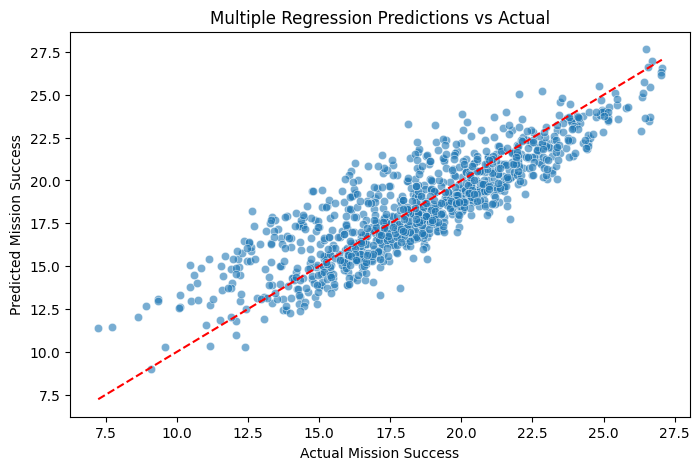

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Mission Success")
plt.ylabel("Predicted Mission Success")
plt.title("Multiple Regression Predictions vs Actual")
plt.show()

## Polynomial Regression

In [14]:
# Add polynomial terms (degree 4)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

poly_mse = mean_squared_error(y, y_poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y, y_poly_pred)

print(f"Polynomial MSE: {poly_mse:.2f}")
print(f"Polynomial RMSE: {poly_rmse:.2f}")
print(f"Polynomial R² Score: {poly_r2:.2f}")

Polynomial MSE: 2.66
Polynomial RMSE: 1.63
Polynomial R² Score: 0.78


## Visualize Predictions vs Actual for Polynomial Regression

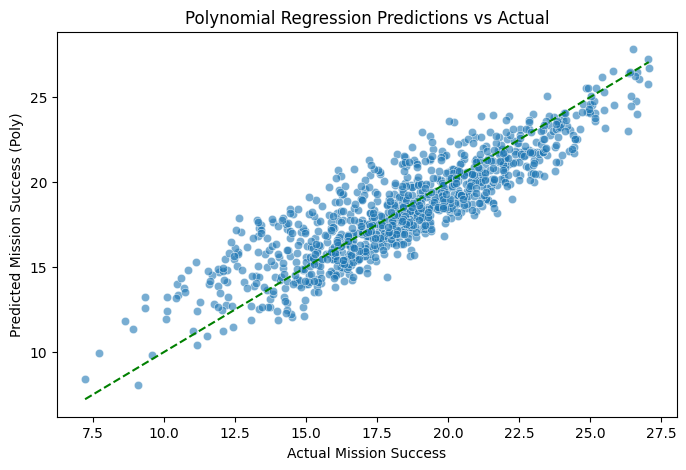

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y, y=y_poly_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'g--')
plt.xlabel("Actual Mission Success")
plt.ylabel("Predicted Mission Success (Poly)")
plt.title("Polynomial Regression Predictions vs Actual")
plt.show()

## Visualize Multi-Linear & Polynomial Regression

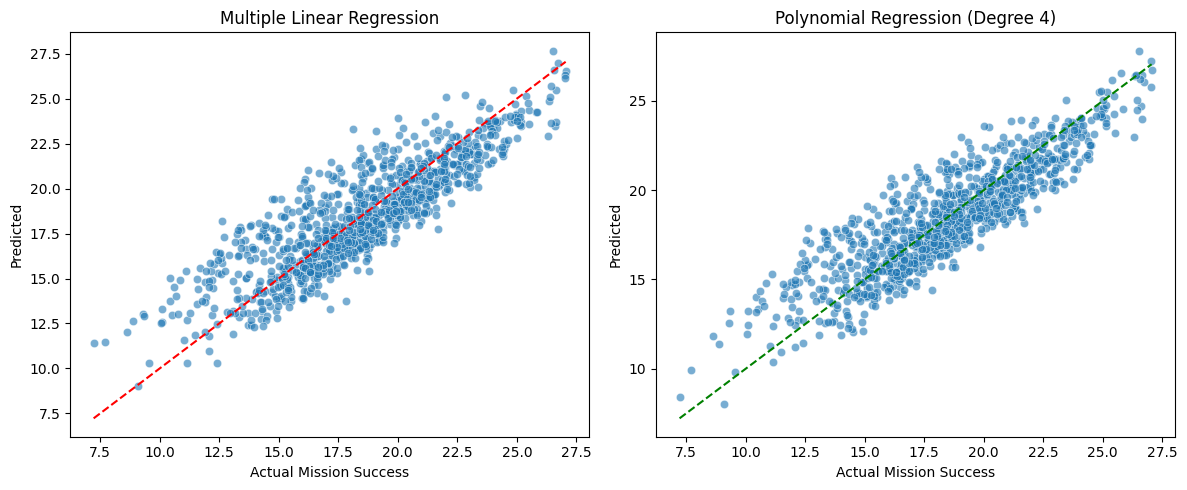

In [16]:
plt.figure(figsize=(12, 5))

# Linear regression plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Mission Success")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression")

# Polynomial regression plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y, y=y_poly_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'g--')
plt.xlabel("Actual Mission Success")
plt.ylabel("Predicted")
plt.title("Polynomial Regression (Degree 4)")

plt.tight_layout()
plt.show()

### What this tells us

Using **multiple features** helped the model capture more of the variation in mission success. Polynomial regression gave the model more flexibility — letting it capture subtle, nonlinear patterns in the data.

- Positive coefficients suggest a direct relationship (e.g., more fuel → higher success)
- Negative ones suggest inverse relationships (e.g., higher solar flare risk → lower success)

Even with polynomial terms, we have to be cautious: overfitting is a risk, and interpretation gets harder as complexity increases. More on that, later.

**Takeaway:** When relationships aren’t linear — try curves. Polynomial regression gives you that power.

📌 Next up: **Day 3 – Feature Engineering & Multilinear Modeling Techniques**
